# 23.1 時間序列
## 序列種類
#### 1. 橫斷面資料 不同個體在同一時間的屬性或特徵變數的數據
        ex:同一年度這些公司的淨收益
#### 2. 時間序列資料 同一個個體的某個特徵隨時間推移不斷發展的過程
        ex:股票的日收盤價
#### 3. 追蹤資料 不同個體的某個特徵隨時間的推移各自變化的過程
        ex:所有上市公司股票每天的日收益率
## 時間序列分析涉及以下幾個內容
#### 1. 資料有哪些基本特徵
#### 2. 資料是否有規律可循
#### 3. 如果有規律，該如何透過模型找到規律並說明他
#### 4. 多個時間序列之間是否存在某種關聯 該如何刻劃關聯
#### 5. 如何利用歷史資料表現的規律對未來進行預測

# 23.2 Python時間序列資料

In [7]:
import pandas as pd
taiex = pd.read_csv('taiex.csv',sep='\t')
taiex.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2014-01-02,8618.60,8632.81,8587.54,8612.54,4462792
1,1,2014-01-03,8584.74,8584.74,8537.86,8546.54,4406184
2,2,2014-01-06,8553.00,8568.24,8488.64,8500.01,4556810
3,3,2014-01-07,8515.36,8547.19,8512.30,8512.30,4489316
4,4,2014-01-08,8548.61,8587.08,8548.61,8556.01,5447851


In [8]:
#數據類型
type(taiex)

pandas.core.frame.DataFrame

In [9]:
#取收盤數據
Close = taiex['Close']
Close.head()

0    8612.54
1    8546.54
2    8500.01
3    8512.30
4    8556.01
Name: Close, dtype: float64

In [10]:
type(Close)

pandas.core.series.Series

In [11]:
type(Close.index)

pandas.core.indexes.range.RangeIndex

In [12]:
#將收盤指數轉換成時間序列格式
Close.index = pd.to_datetime(taiex['Date'])
Close.head()

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
Name: Close, dtype: float64

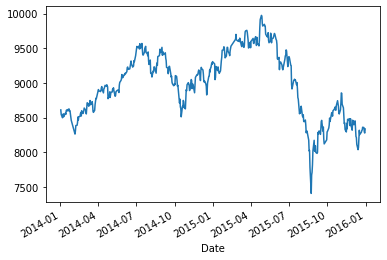

In [13]:
#繪製時間序列圖
Close.plot()

# 23.3選定特定日期的時間序列資料

In [15]:
taiex.index = pd.to_datetime(taiex['Date'])
taiex.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2014-01-02,0,2014-01-02,8618.60,8632.81,8587.54,8612.54,4462792
2014-01-03,1,2014-01-03,8584.74,8584.74,8537.86,8546.54,4406184
2014-01-06,2,2014-01-06,8553.00,8568.24,8488.64,8500.01,4556810
2014-01-07,3,2014-01-07,8515.36,8547.19,8512.30,8512.30,4489316
2014-01-08,4,2014-01-08,8548.61,8587.08,8548.61,8556.01,5447851


In [17]:
taiex = taiex.iloc[:,1:]
taiex.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02,2014-01-02,8618.60,8632.81,8587.54,8612.54,4462792
2014-01-03,2014-01-03,8584.74,8584.74,8537.86,8546.54,4406184
2014-01-06,2014-01-06,8553.00,8568.24,8488.64,8500.01,4556810
2014-01-07,2014-01-07,8515.36,8547.19,8512.30,8512.30,4489316
2014-01-08,2014-01-08,8548.61,8587.08,8548.61,8556.01,5447851


In [21]:
#擷取特定期間資料
taiexPart = taiex['2015-10-08':'2015-10-31']
taiexPart.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-10-08,2015-10-08,8528.46,8544.93,8434.50,8445.96,4582747
2015-10-12,2015-10-12,8478.34,8578.22,8478.34,8573.72,4663975
2015-10-13,2015-10-13,8571.57,8574.11,8518.41,8567.92,4628841
2015-10-14,2015-10-14,8545.14,8553.87,8515.53,8522.51,4661254
2015-10-15,2015-10-15,8573.38,8652.47,8573.38,8601.52,4925269


In [33]:
#2015年的資料
taiex2015 = taiex['2015']
taiex2015.tail()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-12-25,2015-12-25,8328.94,8364.30,8320.10,8363.28,2699121
2015-12-28,2015-12-28,8374.18,8394.60,8358.49,8358.49,2661228
2015-12-29,2015-12-29,8349.27,8351.16,8286.84,8293.91,2947257
2015-12-30,2015-12-30,8313.37,8342.34,8262.52,8279.99,3048259
2015-12-31,2015-12-31,8273.77,8338.06,8258.73,8338.06,2499013


In [36]:
#2014 9月到年底資料
taiex9End = taiex['2014-09':'2014']
taiex9End.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2014-09-01,2014-09-01,9474.41,9532.66,9472.96,9513.06,5171496
2014-09-02,2014-09-02,9503.65,9503.65,9388.13,9399.72,5498915
2014-09-03,2014-09-03,9434.88,9455.78,9396.79,9450.35,5333115
2014-09-04,2014-09-04,9439.76,9439.76,9389.29,9428.89,4648234
2014-09-05,2014-09-05,9446.45,9451.39,9365.70,9407.94,4286784


# 23.4 時間序列資料敘述性統計

In [37]:
Close.head()

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
Name: Close, dtype: float64

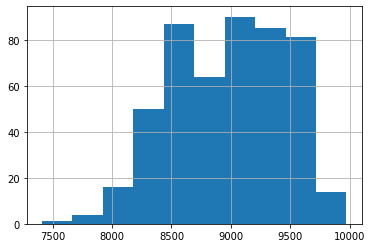

In [40]:
#直方圖
Close.hist()

In [41]:
Close.max()  #最大

9973.12

In [42]:
Close.mean() #平均

8975.81046747968

In [43]:
Close.min() #最小

7410.34

In [44]:
Close.median() #中位數

9002.19

In [45]:
Close.std() #標準差

476.94625169135

In [46]:
Close.describe() 

count     492.000000
mean     8975.810467
std       476.946252
min      7410.340000
25%      8599.502500
50%      9002.190000
75%      9370.940000
max      9973.120000
Name: Close, dtype: float64